# 이진분류
- 와인 데이터셋

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [35]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/winequality-rw.csv
To: /content/winequality-rw.csv
421kB [00:00, 21.0MB/s]       


In [36]:
wine = pd.read_csv('/content/winequality-rw.csv', index_col=0)

In [37]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [38]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  target                6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [39]:
wine.isna().sum(axis=0)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [40]:
wine.shape

(6497, 13)

In [41]:
wine['target'] = wine['target'].map({
                  'red':0, 
                  'white':1
})

In [42]:
X = wine.drop(['target'], axis=1)
y = wine['target']
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
X.shape

(6497, 12)

In [44]:
y.shape

(6497,)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape)

(5197, 12) (1300, 12)


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [47]:
def build_model():

    model = keras.Sequential([
        layers.Dense(units=64, activation='relu', input_shape=(12,)),      #activation='relu'가 가장 학습 잘됨
        layers.Dense(units=8, activation='relu'),
        layers.Dense(units=1, activation='sigmoid')                       #이진분류 모델은 activation을 시그모이드로 해야함 / 다중분류:소프트맥스
        ])

    loss = tf.keras.losses.BinaryCrossentropy()                           #이진분류
    adam = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
          optimizer=adam,
          loss=loss,
          metrics=['accuracy']
          )
    
    return model

In [48]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [49]:
loss = tf.keras.losses.BinaryCrossentropy()                 #이진분류
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam,
    loss=loss,
    metrics=['accuracy']
)

In [50]:
EPOCHS = 100
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.1960 - accuracy: 0.9538 - val_loss: 0.0601 - val_accuracy: 0.9894
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9906 - val_loss: 0.0394 - val_accuracy: 0.9913
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9942 - val_loss: 0.0319 - val_accuracy: 0.9942
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9959 - val_loss: 0.0290 - val_accuracy: 0.9952
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9964 - val_loss: 0.0266 - val_accuracy: 0.9952
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9964 - val_loss: 0.0253 - val_accuracy: 0.9962
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9969 - val_loss: 0.0235 - val_accuracy: 0.9962

In [51]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

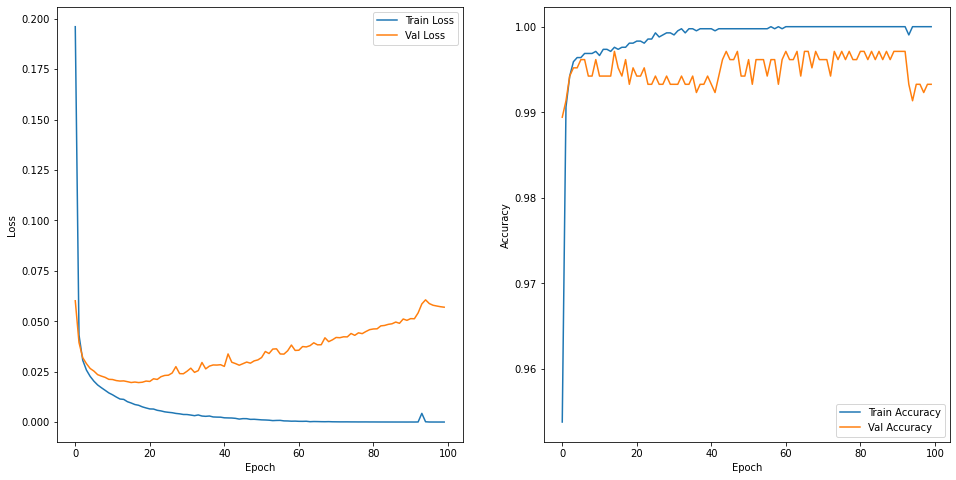

In [52]:
plot_history(history)

In [53]:
model.evaluate(X_train_s, y_train)

163/163 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9987


[0.011418474838137627, 0.9986530542373657]

In [54]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

model.evaluate(X_test_s, y_test)                            

41/41 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9954


[0.10434170067310333, 0.9953846335411072]

In [55]:
y_pred = model.predict(X_test_s)
y_pred = y_pred.flatten()
y_pred

41/41 [==============================] - 0s 2ms/step


array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
       2.5954657e-07, 1.0000000e+00], dtype=float32)

In [56]:
y_pred = (y_pred > 0.5).astype(int)                                #y_pred > 0.5 기준 [1,0]으로 변경
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [57]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

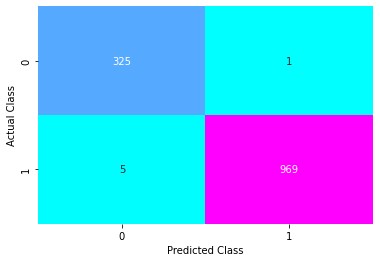

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='cool', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()